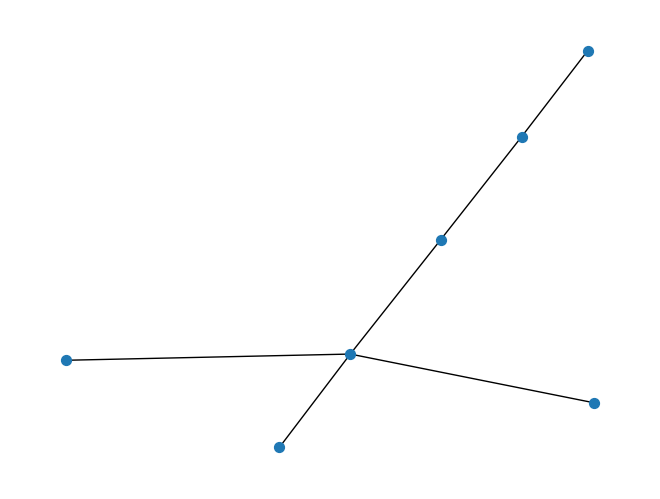

In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to calculate the spectral density function from an adjacency matrix
def spectral_density(A):
    # Calculate the eigenvalues of A
    lam = np.linalg.eigvals(A)

    # Count the number of occurrences of each eigenvalue
    unique_lam, counts = np.unique(lam, return_counts=True)

    # Calculate the spectral density function
    f_G = np.zeros(len(unique_lam))
    for i in range(len(unique_lam)):
        f_G[i] = counts[i] / len(lam)

    return unique_lam, f_G

# Example adjacency matrix
A = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])

# Calculate the spectral density function
lam, f_G = spectral_density(A)

# Generate a set of frequencies (x-values)
x = np.linspace(np.min(lam)-0.5, np.max(lam)+0.5, 10)

# Evaluate the spectral density function at each frequency (y-values)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = np.sum(f_G * np.exp(-0.5*(x[i]-lam)**2))

# Generate edges based on the y-values
G = nx.Graph()
for i in range(len(x)):
    for j in range(i+1, len(x)):
        if np.random.rand() < y[i]*y[j]:
            G.add_edge(i, j)

# Draw the graph
nx.draw(G, pos=nx.spring_layout(G), node_size=50)
plt.show()
